# Two coupled spins: Part 1 the total $S_z$

The coupling of spins is a key to understand atomic physics. An example is the coupling between the electron and proton spin in hydrogen which gives the famous 21 cm line used in astronomy. 

Here we will consider precisely such a coupling of two spin 1/2 systems. We are interested in the total spin ${\bf S}={\bf S}_1+{\bf S}_2$ and in this first (of two) exercises we will consider the $z$-component $S_z$. 

**Learning goal:** These exercises will allow you to build and test your intuition of two coupled spin 1/2 systems. In particular, you will (hopefully) be able to determine what happens to a coupled spin state after a measurement of $S_z$ or $S^2$.


**Notation:** We use the notation of Griffiths and Schröeter where $|\uparrow\rangle$ is the state $|s,m\rangle=|1/2,1/2\rangle$ and $|\downarrow\rangle=|1/2,-1/2\rangle$.

**Setup:** Throughout this exercise we will think of each qubit as a spin 1/2 system and we will identify the state $|0\rangle$ with $|\downarrow\rangle$ and the state $|1\rangle$ with $|\uparrow\rangle$. If we measure the operator $M$ on a qubit and find '0' ('1') the intrepretaion therefore is that we have measured the $z$-component of the first (second) spin 1/2 system and found the value $-\hbar/2$ ($\hbar/2$). In other words a measurement of $M$, on the first qubit say, corresponds to a measurement of $S_{1z}$.


**Measurement of $S_z$**

Let's first look the $z$-component of the total spin $S_z=S_{1z}+S_{2z}$. We will start with a couple of exercises before we get to the experiment. 

**Reminder/background:** As a reminder/background you may want to (re)read section 4.4.3 of Griffiths and Schroeter 3ed.

**Exercise 1:** The state $|\uparrow\uparrow\rangle$ is an eigenstate of $S_z$. Determine the associated eigenvalue.

**Exercise 2:** Explain why the state  

\begin{equation}
|\psi\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\uparrow\rangle+|\downarrow\downarrow\rangle\big)
\end{equation}

is $not$ an eigenstate of $S_z$.


**Exercise 3/ Your prediction:** Suppose the system is in the state $|\psi\rangle$ given above. What are the possible outcomes of a measurement of $S_z$?

Let's now set up the system in the state $|\psi\rangle$ and then measure $S_{1z}$ and $S_{2z}$.

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

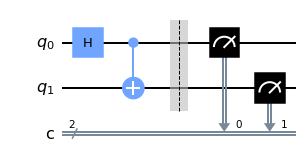

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

In [3]:
simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(qc, shots=10, memory=True).result() # shots=10 means do the experiment 10 times
memory = result.get_memory(qc)
print(memory)

['11', '00', '11', '11', '11', '00', '11', '00', '11', '00']


**How to read the result:** The rightmost of the digits in a pair is the result of measuring $M$
 on the first qubit and the leftmost within the pair is from the second qubit. There are 10 pairs since we have repeated the measurement 10 times.

**Note:** since $S_{1z}$ acts solely on the first qubit while $S_{2z}$ acts only on the second we may perform a measurement of $S_z=S_{1z}+S_{2z}$ by simply performing a measurement of $S_{1z}$ on the first qubit and subsequently one of $S_{2z}$. To get the measurement of $S_z$ we simply add the two outcomes of the measurements of $S_{1z}$ and $S_{2z}$. So the result '00' imply that we have measured $S_z$ and found the value $-\hbar/2-\hbar/2=-\hbar$.

**Exercise 4:** Hopefully the outcome of the measurement above was consistent with your prediction! But, why are the measured values for $S_{1z}$ and $S_{2z}$ the same in this case? 


Let's do two more experiments with $S_z$, which will be of great use when we turn to $S^2$ in the second part.

First we will set up the state 

\begin{equation}
|\psi_+\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\downarrow\rangle+| \downarrow\uparrow\rangle\big) \ .
\end{equation}

**Exercise 5/ Your prediction:** What are the possible outcomes of a measurement of the total $S_z$ if the system is in the state $|\psi_+\rangle$? 


Let's check your prediction with the experiment below.

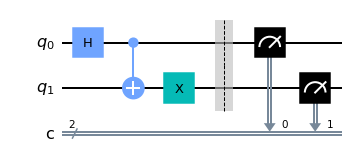

In [4]:
qc = QuantumCircuit(2,2)
qc.h(0) # this and the following two lines sets up the state
qc.cx(0,1)
qc.x(1)
qc.barrier() # juts a vertical line to keep things well separated in the diagram
qc.measure(0,0) #measures S_{1z}
qc.measure(1,1) #measures S_{2z}
qc.draw()

In [5]:
simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['10', '10', '01', '01', '01', '01', '01', '01', '01', '01']


**Recall 1:** That $'01'$ implies that the value measured for $S_{1z}$ was $\hbar/2$ and for $S_{2z}$ it was $-\hbar/2$.

**Recall 2:** To get the measured value of the total $S_z$ add the two values just measured for $S_{1z}$ and $S_{2z}$. 

**Check:** Did the outcome match your prediction? If not try to go back and see if you can find out what went wrong!

**Exercise 6:** Suppose instead we start the system in the state 

\begin{equation}
|\psi_-\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\downarrow\rangle-|\downarrow\uparrow\rangle\big) \ .
\end{equation}

what will change (if anything) when we measure $S_z$?

Now test your answer by running the experiment below!

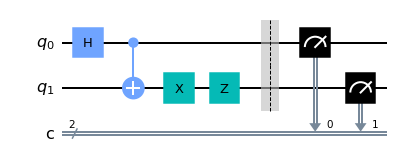

In [10]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.x(1)
qc.z(1)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

In [11]:
simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['01', '01', '10', '01', '01', '10', '10', '10', '10', '01']


**Don't miss:** We find that the measurement of $S_z$ when the system is in the state $|\psi_-\rangle$ gives us $0\hbar$ each time, just as we found for the state $|\psi_+\rangle$.

**Take home:** If we start our system in the state $|\psi_+\rangle$ the value measured for $S_z$ is always 0 and we get just the same result if  we start our system in the state $|\psi_-\rangle$. This is so because both states are eigenstates of $S_z$ with eigenvalue $0\hbar$.